# SMALL ANALYSIS ON COVID-19 DATASET USING PANDAS.

## IMPORT SPECIFIC MODULES.

In [1]:
import pandas as pd
import numpy as np

READ THE CSV FILE.

In [2]:
covid_data=pd.read_csv('4. covid_19_data.csv')

In [3]:
covid_data

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


In [4]:
covid_data.shape  #it shows how many rows and columns we have in our dataset

(321, 6)

In [5]:
covid_data.info() ##some info about our dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       321 non-null    object
 1   State      140 non-null    object
 2   Region     321 non-null    object
 3   Confirmed  321 non-null    int64 
 4   Deaths     321 non-null    int64 
 5   Recovered  321 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 11.3+ KB


In [6]:
covid_data.nunique()

Date           1
State        137
Region       187
Confirmed    282
Deaths       142
Recovered    195
dtype: int64

In [7]:
covid_data['State'].unique()

array([nan, 'Alabama', 'Alaska', 'Alberta', 'Anguilla', 'Anhui',
       'Arizona', 'Arkansas', 'Aruba', 'Australian Capital Territory',
       'Beijing', 'Bermuda', 'Bonaire, Sint Eustatius and Saba',
       'British Columbia', 'British Virgin Islands', 'California',
       'Cayman Islands', 'Channel Islands', 'Chongqing', 'Colorado',
       'Connecticut', 'Curacao', 'Delaware',
       'Diamond Princess cruise ship', 'District of Columbia',
       'Falkland Islands (Malvinas)', 'Faroe Islands', 'Florida',
       'French Guiana', 'French Polynesia', 'Fujian', 'Gansu', 'Georgia',
       'Gibraltar', 'Grand Princess', 'Greenland', 'Guadeloupe', 'Guam',
       'Guangdong', 'Guangxi', 'Guizhou', 'Hainan', 'Hawaii', 'Hebei',
       'Heilongjiang', 'Henan', 'Hong Kong', 'Hubei', 'Hunan', 'Idaho',
       'Illinois', 'Indiana', 'Inner Mongolia', 'Iowa', 'Isle of Man',
       'Jiangsu', 'Jiangxi', 'Jilin', 'Kansas', 'Kentucky', 'Liaoning',
       'Louisiana', 'Macau', 'Maine', 'Manitoba', 'Marti

In [8]:
covid_data['State'].value_counts()

Diamond Princess cruise ship    2
Grand Princess                  2
Recovered                       2
North Dakota                    1
Hawaii                          1
                               ..
Saint Barthelemy                1
Arizona                         1
Guadeloupe                      1
Hong Kong                       1
Manitoba                        1
Name: State, Length: 137, dtype: int64

In [9]:
covid_data.count()

Date         321
State        140
Region       321
Confirmed    321
Deaths       321
Recovered    321
dtype: int64

In [10]:
covid_data.isnull().sum() ##to check how many null values we have...

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt  ## for visualization so that it look more interactive.

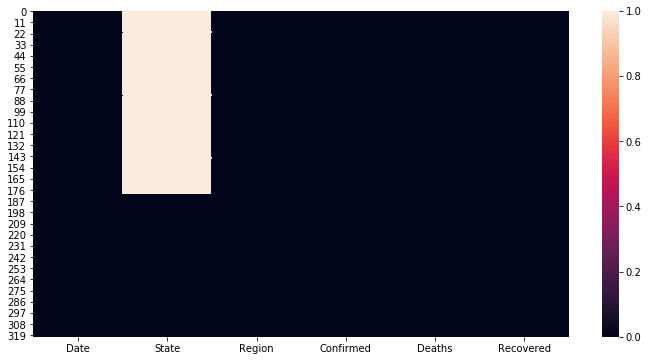

In [12]:
plt.figure(figsize=(12,6))
sns.heatmap(covid_data.isnull())

### Q.1)Show the number of confirmed,deaths,recovered in each region.

In [85]:
df=covid_data.groupby('Region').sum().head(10)
df

,Confirmed,Deaths,Recovered
Region,,,
Afghanistan,1939,60,252
Albania,766,30,455
Algeria,3848,444,1702
Andorra,743,42,423
Angola,27,2,7
Antigua and Barbuda,24,3,11
Argentina,4285,214,1192
Armenia,1932,30,900
Australia,6752,91,5715


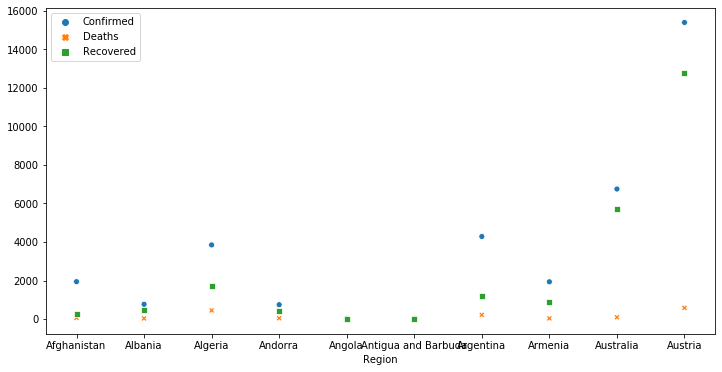

In [86]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df)

### Q.2) Remove all the records where confirmed cases is less than 10.

In [14]:
covid_data=covid_data[~(covid_data.Confirmed < 10)]

In [15]:
covid_data

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


### Q.3)In which region maximum number of cases are recorded?

In [67]:
confirmed_data=covid_data.groupby('Region')['Confirmed'].sum().sort_values(ascending=False).head(15)
confirmed_data

Region
US                1039909
Spain              236899
Italy              203591
France             166536
UK                 166432
Germany            161539
Turkey             117589
Russia              99399
Iran                93657
Mainland China      82861
Brazil              79685
Canada              52860
Belgium             47859
Netherlands         38993
Peru                33931
Name: Confirmed, dtype: int64

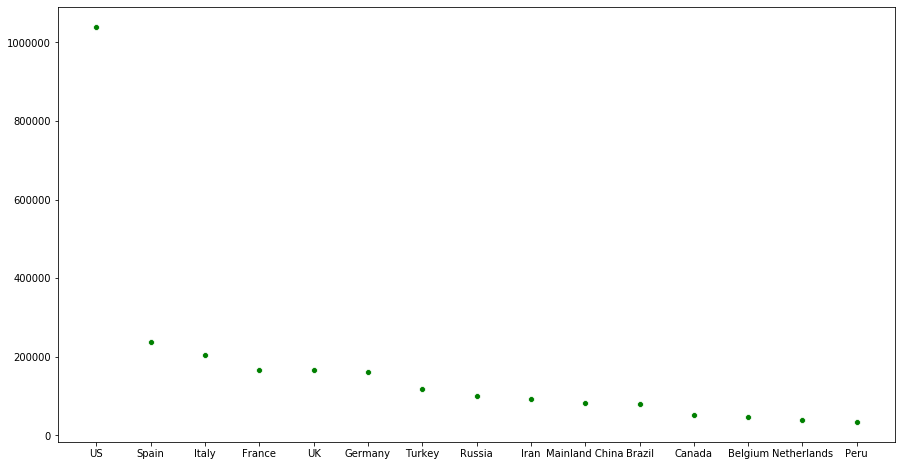

In [43]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=confirmed_data,color='g')

### Q.4)In which region maximum number of death are recorded?

In [66]:
death_data=covid_data.groupby('Region')['Deaths'].sum().sort_values(ascending=False).head(10)
death_data

Region
US             60967
Italy          27682
UK             26165
Spain          24275
France         24121
Belgium         7501
Germany         6467
Iran            5957
Brazil          5513
Netherlands     4727
Name: Deaths, dtype: int64

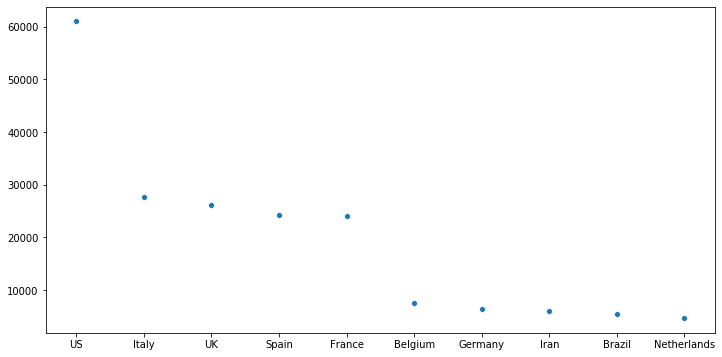

In [91]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=death_data)

### Q.5) In which region maximum number of recovery are recorded?

In [57]:
recover_data=covid_data.groupby('Region')['Recovered'].sum().sort_values(ascending=False).head(15)
recover_data

Region
Spain             132929
Germany           120400
Mainland China     77609
Iran               73791
Italy              71252
France             49112
Turkey             44040
Brazil             34132
Switzerland        22600
Ireland            13386
Austria            12779
Mexico             11423
Belgium            11283
Russia             10286
Peru               10037
Name: Recovered, dtype: int64

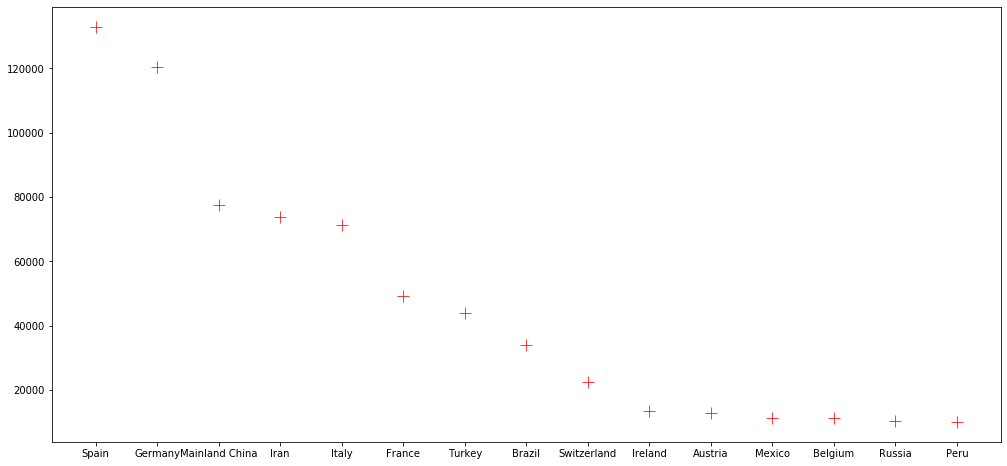

In [77]:
plt.figure(figsize=(17,8))
sns.scatterplot(data=recover_data,color='r',marker='+',s=150)

### Q.6) In which region minimum number of deaths cases are recorded?

In [92]:
min_deaths=covid_data.groupby('Region')['Deaths'].sum().sort_values(ascending=True).head(10)

In [93]:
min_deaths

Region
Cambodia                    0
Seychelles                  0
Saint Lucia                 0
Central African Republic    0
Saint Kitts and Nevis       0
South Sudan                 0
Rwanda                      0
Grenada                     0
Macau                       0
Madagascar                  0
Name: Deaths, dtype: int64

### Q.7) How many confirmed,deaths and recovered cases are there from indian till 29 april 2020?

In [94]:
india_df=covid_data[covid_data['Region'] == 'India']

In [95]:
india_df

,Date,State,Region,Confirmed,Deaths,Recovered
74,4/29/2020,NaN,India,33062,1079,8437


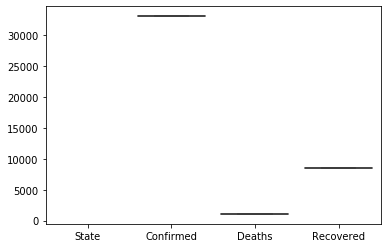

In [101]:
sns.boxplot(data=india_df)